In [2]:
import vit_prisma

from datasets import load_dataset

In [20]:
# Load model[]

# Takes a few minutes to download (in future create mini version with only 1k samples)

data = load_dataset('Prisma-Multimodal/segmented-imagenet1k-subset', cache_dir='/network/scratch/s/sonia.joseph/huggingface')

/home/mila/s/sonia.joseph/ViT-Planetarium/prisma_env/lib/python3.9/site-packages/datasets/load.py:1454: FutureWarning: The repository for Prisma-Multimodal/segmented-imagenet1k-subset contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/Prisma-Multimodal/segmented-imagenet1k-subset
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

In [3]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch

In [36]:
data['train']['labels'][0]

['floor', 'catfish', 'carp', 'lay', 'purple', 'floor', 'catfish']

In [64]:
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch

class CustomDataset(Dataset):
    def __init__(self, hf_dataset, transform=None):
        self.hf_dataset = hf_dataset
        self.transform = transform

    def __len__(self):
        return len(self.hf_dataset)

    def __getitem__(self, idx):
        # Load the image
        item = self.hf_dataset[idx]
        
        image = item['image'].convert("RGB")
        
        # Apply transformations if any
        if self.transform:
            image = self.transform(image)

        boxes = item.get('boxes', [])
        labels = item.get('labels', [])
        scores = item.get('scores', [])
        masks = item.get('masks', [])  # Assuming masks are binary
        
#         print(type(image))
#         print(type(boxes))
#         print(type(labels))
#         print(type(scores))
#         print(type(masks))
#         print(type(masks[0]))


        # Return a dict of your data
        return {
            "image": image, 
            "boxes": boxes, 
            "labels": labels, 
            "scores": scores, 
#             "masks": masks
        }

# Define your transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to a fixed size
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images
])

# Use the transform in your dataset
train_dataset = CustomDataset(data['train'], transform=transform)
test_dataset = CustomDataset(data['test'], transform=transform)
validation_dataset = CustomDataset(data['validation'], transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
validation_loader = DataLoader(validation_dataset, batch_size=1, shuffle=False)


In [67]:
items = next(iter(train_loader))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


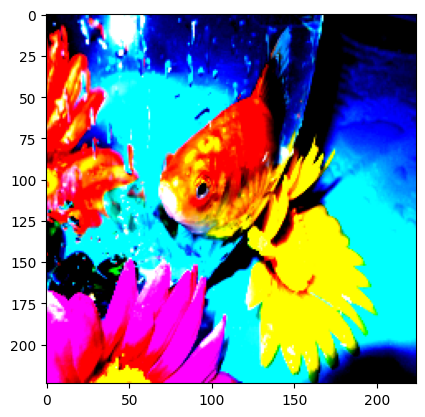

In [77]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(items['image'][0].permute(1, 2, 0))

In [8]:
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch


In [4]:
# Second dataset
data = load_dataset('manuel-delverme/test_repo')


/home/mila/s/sonia.joseph/ViT-Planetarium/prisma_env/lib/python3.9/site-packages/datasets/load.py:1454: FutureWarning: The repository for manuel-delverme/test_repo contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/manuel-delverme/test_repo
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


LOADING SCRIPT
LOADING SCRIPT
LOADING SCRIPT
LOADING SCRIPT
LOADING SCRIPT
LOADING SCRIPT
LOADING SCRIPT
LOADING SCRIPT
LOADING SCRIPT
LOADING SCRIPT


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [13]:
class CustomDataset(Dataset):
    def __init__(self, hf_dataset, transform=None):
        self.hf_dataset = hf_dataset
        self.transform = transform

    def __len__(self):
        return len(self.hf_dataset)

    def __getitem__(self, idx):
        # Load the image
        item = self.hf_dataset[idx]
        
        image = item['image'].convert("RGB")
        
        # Apply transformations if any
        if self.transform:
            image = self.transform(image)
            
        patches = item['patches']

#         boxes = item.get('boxes', [])
#         labels = item.get('labels', [])
#         scores = item.get('scores', [])
#         masks = item.get('masks', [])  # Assuming masks are binary
        
#         print(type(image))
#         print(type(boxes))
#         print(type(labels))
#         print(type(scores))
#         print(type(masks))
#         print(type(masks[0]))


        # Return a dict of your data
        return {
            "image": image, 
            'patches': patches,
#             "boxes": boxes, 
#             "labels": labels, 
#             "scores": scores, 
#             "masks": masks
        }

# Define your transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to a fixed size
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images
])

# Use the transform in your dataset
train_dataset = CustomDataset(data['train'], transform=transform)
test_dataset = CustomDataset(data['test'], transform=transform)
validation_dataset = CustomDataset(data['validation'], transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
validation_loader = DataLoader(validation_dataset, batch_size=1, shuffle=False)

In [11]:
items = next(iter(train_loader))

In [17]:
train_dataset[0].keys()

dict_keys(['image', 'patches'])

In [55]:
import numpy as np

patch_mask = train_dataset[0]['patches']['mask'][0]
patch_mask = np.array(patch_mask)
patch_mask

array([[ True,  True,  True,  True,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True,  True,  True,
         True],
       [ True,  True,  True,  True, False, False, False, False, False,
        False

In [54]:
import ast

for i in train_dataset[2]['patches'].keys():
    print(i, len(train_dataset[0]['patches'][i]))


    print(type(train_dataset[0]['patches'][i]))
    print(train_dataset[0]['patches'][i])
    
    
    print()

categories 42
<class 'str'>
['close-up', 'gecko', 'tree frog', 'frog']

scores 4
<class 'list'>
[0.7099999785423279, 0.41999998688697815, 0.28999999165534973, 0.25]

mask 4
<class 'list'>
[[[True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True], [True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True], [True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True], [True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True], [True, True, True, True, False, False, False, False, Fal

In [85]:
import numpy as np

def get_categories_for_patch_flat(categories, masks, patch_index, patch_size):
    """
    Returns the categories that have a mask over the specified patch,
    identified by a flat index.

    Parameters:
    - categories: List of category names.
    - masks: Numpy array of shape (category_num, patch_size, patch_size) representing boolean masks.
    - patch_index: The flat index of the patch in the flattened grid.
    - patch_size: The size of one dimension of the patch grid.

    Returns:
    - List of categories that cover the specified patch.
    """
    # Calculate x and y coordinates from the flat index
    x = patch_index // patch_size
    y = patch_index % patch_size

    # Initialize a list to hold the categories that cover the specified patch
    covered_categories = []

    # Iterate over each category and its corresponding mask
    for category, mask in zip(categories, masks):
        # Check if the mask covers the specified patch
        if mask[x, y]:
            covered_categories.append(category)

    return covered_categories

# Example usage

categories = train_dataset[0]['patches']['categories']
categories = ast.literal_eval(categories)

masks = train_dataset[0]['patches']['mask']
masks = np.array(masks)

patch_size = 8  # Example patch size
patch_index = 0 # Example flat index

covered_categories = get_categories_for_patch_flat(categories, masks, patch_index, patch_size)
print("Categories covering patch index {}:".format(patch_index), covered_categories)




Categories covering patch index 0: ['close-up']


In [94]:
import numpy as np
import matplotlib.pyplot as plt

def highlight_patch_on_image(image, patch_number, patch_size):
    """
    Highlights a specific patch on the original image.

    Parameters:
    - image: Original image as a numpy array.
    - patch_number: The flattened patch number to highlight.
    - patch_size: Size of each patch (assuming square patches).

    Returns:
    - Highlighted image.
    """
    # Calculate the total number of patches along each dimension
    num_patches_per_dim = image.shape[0] // patch_size
    
    # Convert flattened patch number to x, y coordinates
    patch_x = patch_number // num_patches_per_dim
    patch_y = patch_number % num_patches_per_dim
    
    # Calculate the pixel coordinates in the original image
    pixel_x = patch_x * patch_size
    pixel_y = patch_y * patch_size

    # Create a copy of the image to highlight the patch
    highlighted_image = np.copy(image)
    
    # Highlight the patch - here we just add a colored border for simplicity
    # Adjust this logic as needed to fit your highlighting preferences
    highlighted_image[pixel_x:pixel_x + patch_size, pixel_y, :] = [255, 0, 0]  # Left border
    highlighted_image[pixel_x:pixel_x + patch_size, pixel_y + patch_size - 1, :] = [255, 0, 0]  # Right border
    highlighted_image[pixel_x, pixel_y:pixel_y + patch_size, :] = [255, 0, 0]  # Top border
    highlighted_image[pixel_x + patch_size - 1, pixel_y:pixel_y + patch_size, :] = [255, 0, 0]  # Bottom border

    return highlighted_image


highlighted_image = highlight_patch_on_image(image, patch_number, patch_size)

# Show the original and h


ZeroDivisionError: integer division or modulo by zero

In [88]:
def patch_index_to_coordinates(patch_index, patch_size, image_size):
    patches_per_row = image_size // patch_size
    x = (patch_index % patches_per_row) * patch_size
    y = (patch_index // patches_per_row) * patch_size
    return x, y


In [124]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def highlight_patch_on_image(image, patch_index, patch_size, categories, masks):
    """
    Highlights the specified patch on the original image by overlaying a semi-transparent mask.
    Normalizes the image tensor to range [0, 1] for display.
    """
    if isinstance(image, torch.Tensor):
        # Normalize the image to [0, 1]
        min_val = image.min()
        max_val = image.max()
        image_normalized = (image - min_val) / (max_val - min_val)
        
        image_np = image_normalized.clone().detach().cpu().numpy()
        image_np = np.transpose(image_np, (1, 2, 0))  # Convert from (C, H, W) to (H, W, C)
    else:
        image_np = image  # Assume already a numpy array and normalized

    if image_np.shape[2] == 1:  # Assuming grayscale
        image_np = np.repeat(image_np, 3, axis=2)  # Convert to RGB

    patches_per_row = image_np.shape[0] // patch_size
    x, y = (patch_index % patches_per_row) * patch_size, (patch_index // patches_per_row) * patch_size

    overlay_color = np.array([1.0, 0, 0])  # Red overlay
    alpha = 0.3

    highlighted_image_np = image_np.copy()
    highlighted_image_np[x:x+patch_size, y:y+patch_size, :] = (
        alpha * overlay_color + (1 - alpha) * highlighted_image_np[x:x+patch_size, y:y+patch_size, :]
    )

    plt.imshow(highlighted_image_np)
    plt.axis('off')
    plt.show()


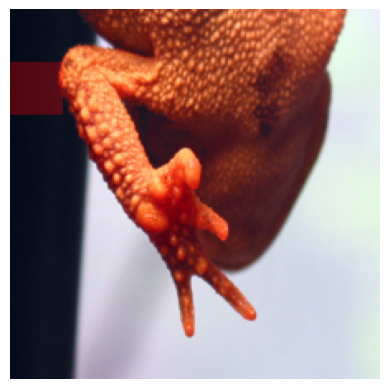

In [125]:
# Assuming image is a numpy array of shape (C, H, W)
# Example image and parameters
patch_index = 1 # Example patch index
patch_size = 32  # Size of each patch
image_size = 224  # Size of the image
categories = ['cat', 'dog']  # Example categories
image = train_dataset[0]['image'] # Example patch size

# Highlight the patch
highlight_patch_on_image(image, patch_index, patch_size, categories, masks)

In [130]:
import torch
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import widgets

def interactive_highlight_plotly(image, patch_size, labels_per_patch):
    """
    Interactive display of image patches and their labels using Plotly.

    Args:
    - image (Tensor): The image tensor of shape (C, H, W).
    - patch_size (int): The size of each square patch.
    - labels_per_patch (list of lists): The labels for every patch.
    """
    image_np = image.clone().detach().cpu().numpy()
    image_np = np.transpose(image_np, (1, 2, 0))  # Convert from (C, H, W) to (H, W, C)
    
    if image_np.shape[2] == 1:  # Assuming grayscale
        image_np = np.repeat(image_np, 3, axis=2)  # Repeat the channel to get RGB

    # Normalize image to [0, 255] if not already
    if image_np.max() <= 1.0:
        image_np = (image_np * 255).astype(np.uint8)

    # Function to update the figure based on the selected patch index
    def update_figure(patch_index):
        # Calculate coordinates of the patch
        patches_per_row = image_np.shape[1] // patch_size
        x, y = (patch_index % patches_per_row) * patch_size, (patch_index // patches_per_row) * patch_size

        # Create figure with initial image
        fig = px.imshow(image_np)

        # Add rectangle for the highlighted patch
        fig.add_shape(type="rect",
                      x0=x, y0=y, x1=x+patch_size, y1=y+patch_size,
                      line=dict(color="red", width=3),
                      fillcolor="rgba(255,0,0,0.2)")

        # Update layout to include labels for the selected patch
        fig.update_layout(title_text=f'Labels: {labels_per_patch[patch_index]}')

        fig.show()

    # Create a slider for selecting the patch index
    slider = widgets.IntSlider(min=0, max=len(labels_per_patch)-1, step=1, value=0, description='Patch Index')
    
    # Display the slider and update the figure upon change
    def on_value_change(change):
        update_figure(change['new'])
    
    slider.observe(on_value_change, names='value')
    display(slider)
    
    # Initial display
    update_figure(slider.value)

# Example usage
image = torch.rand(3, 200, 200)  # Example image tensor
patch_size = 50  # Example patch size
labels_per_patch = [['Cat'], ['Dog'], ['Bird'], ['Tree']]  # Example labels for each patch

interactive_highlight_plotly(image, patch_size, labels_per_patch)


ModuleNotFoundError: No module named 'plotly'

In [1]:
import plotly

ModuleNotFoundError: No module named 'plotly'